# Wheat prices in Madhaya Pradesh

In [30]:
# This is the arima model implementation in the madhya pradesh
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

<class 'pandas.core.frame.DataFrame'>
                     state   district     market commodity      variety  \
Date                                                                      
2023-02-19  Madhya Pradesh  Alirajpur  Alirajpur     Wheat  147 Average   
2023-01-02  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-04  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-05  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-06  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
...                    ...        ...        ...       ...          ...   
2023-10-04  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-05  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-08  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-09  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-10  Madhya Pradesh  Alirajpur      Jobat     Wheat    

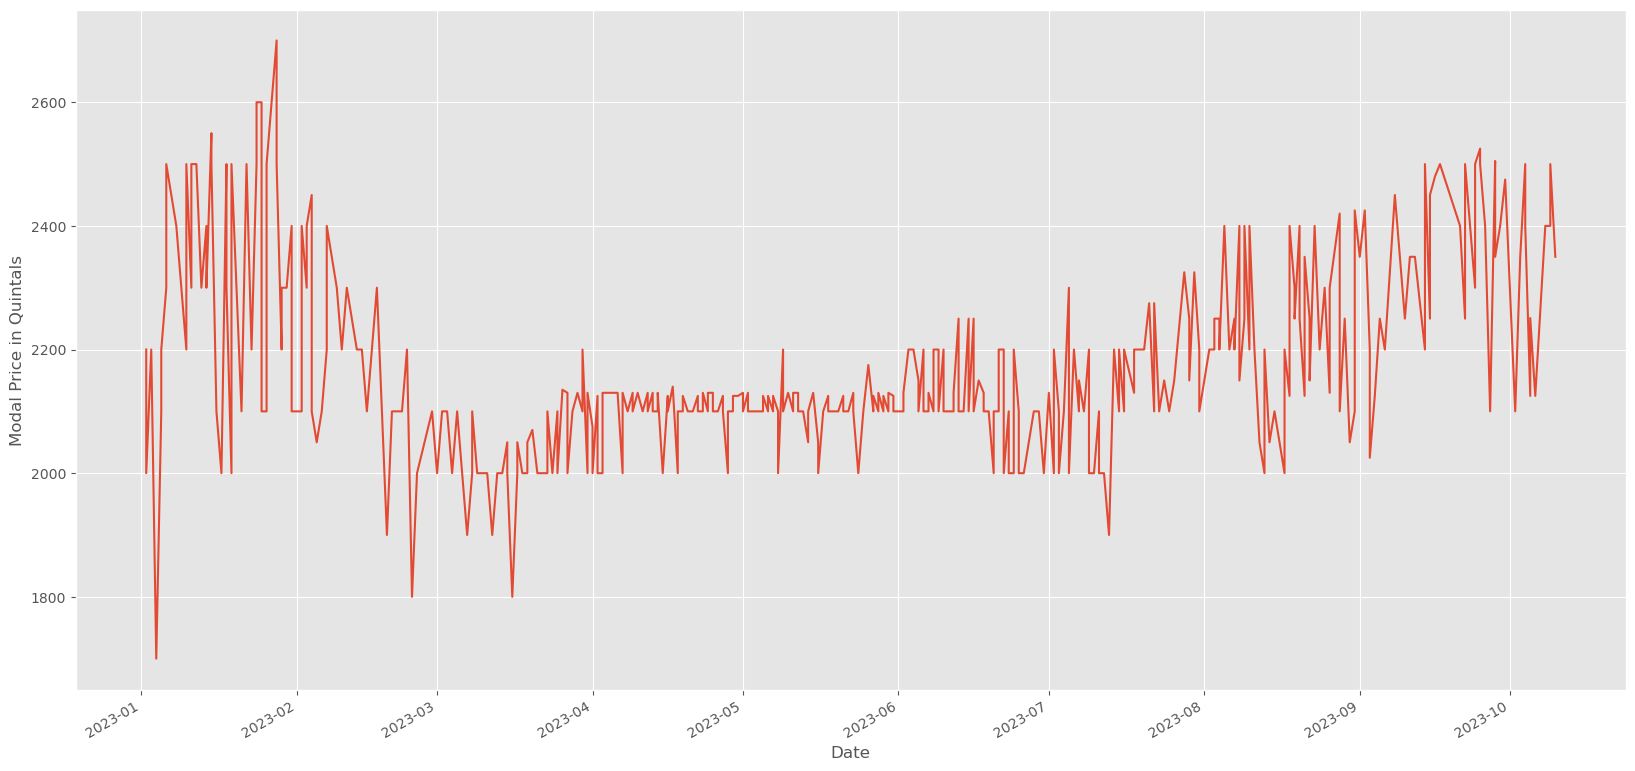

<class 'list'>


In [31]:
data = pd.read_csv('/run/media/rishabh/New Volume/projects/wheat-price-predictor/Data/Proper/MP_Alirajpur_2023.csv',engine='python')
print(type(data))
#changing column name
c_names = data.columns.tolist()
c_names[c_names.index('arrival_date')] = 'Date'
data.columns=c_names


#converting the column to datetime value
data['Date'] = pd.to_datetime(data['Date'],format="%d/%m/%Y")
#print(data)
data.set_index(['Date'],inplace=True)
print(data)
data['modal_price'].plot()
plt.ylabel('Modal Price in Quintals')
plt.xlabel('Date')
plt.show()
# Removing the other colunms for clarity
print(type(c_names))

#print(data.describe())
#for i in c_names:
#    del data[i]

In [69]:
# for item in c_names[:]:  
#     if item == 'modal_price' or item == 'Date':
#         continue
#     else:
#         del data[item]  

#print(c_names)
#print(data.columns.tolist())
 
#print(data)
#print(data.columns.tolist())
#print(data.sort_index())
data_noduplicate = data[data.index.duplicated(keep='first')]
data_cp = data_noduplicate.sort_index()
print("No duplicates")
#print(data_noduplicate)
#print(data_cp)

del data['state']
del data['district']
del data['market']
del data['commodity']
del data['variety']
del data['min_price']
del data['max_price']
del data['update_date']
data




                     state   district     market commodity      variety  \
Date                                                                      
2023-02-19  Madhya Pradesh  Alirajpur  Alirajpur     Wheat  147 Average   
2023-01-02  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-04  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-05  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
2023-01-06  Madhya Pradesh  Alirajpur  Alirajpur     Wheat        Other   
...                    ...        ...        ...       ...          ...   
2023-10-04  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-05  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-08  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-09  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   
2023-10-10  Madhya Pradesh  Alirajpur      Jobat     Wheat        Other   

            min_price  m

,modal_price
Date,
2023-02-19,1900
2023-01-02,2000
2023-01-04,1700
2023-01-05,2100
2023-01-06,2300
...,...
2023-10-04,2500
2023-10-05,2251
2023-10-08,2400


# ARIMA

In [36]:

# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p,d and q triplets
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))




Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [68]:
train_data = data['2023-01-02':'2023-09-03']
test_data = data['2023-09-04':'2023-10-10']
data

,state,district,market,commodity,variety,min_price,max_price,modal_price,update_date
Date,,,,,,,,,
2023-02-19,Madhya Pradesh,Alirajpur,Alirajpur,Wheat,147 Average,1800,2000,1900,2023-10-11
2023-01-02,Madhya Pradesh,Alirajpur,Alirajpur,Wheat,Other,2000,2000,2000,2023-10-11
2023-01-04,Madhya Pradesh,Alirajpur,Alirajpur,Wheat,Other,1600,1800,1700,2023-10-11
2023-01-05,Madhya Pradesh,Alirajpur,Alirajpur,Wheat,Other,2000,2160,2100,2023-10-11
2023-01-06,Madhya Pradesh,Alirajpur,Alirajpur,Wheat,Other,2080,2500,2300,2023-10-11
...,...,...,...,...,...,...,...,...,...
2023-10-04,Madhya Pradesh,Alirajpur,Jobat,Wheat,Other,2151,2500,2500,2023-10-11
2023-10-05,Madhya Pradesh,Alirajpur,Jobat,Wheat,Other,1900,2251,2251,2023-10-11
2023-10-08,Madhya Pradesh,Alirajpur,Jobat,Wheat,Other,2200,2400,2400,2023-10-11


In [37]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.04272D+00    |proj g|=  1.63425D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.634D-08   9.043D+00
  F =   9.0427242042403826     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:2353.1082931024994

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the boun

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.86603D+00    |proj g|=  1.80335D-01

At iterate   15    f=  7.64123D+00    |proj g|=  2.65294D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     24      1     0     0   7.293D-06   7.641D+00
  F =   7.6412318260269565     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1990.7202747670087

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93869D+00    |proj g|=  3.39474D-04

           * * *

Tit   = total number 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  5.85384D+00    |proj g|=  2.68183D-03

At iterate   20    f=  5.85383D+00    |proj g|=  1.08452D-01

At iterate   25    f=  5.85270D+00    |proj g|=  1.21764D+00

At iterate   30    f=  5.84973D+00    |proj g|=  9.92048D-02

At iterate   35    f=  5.84455D+00    |proj g|=  1.56490D+00

At iterate   40    f=  5.84095D+00    |proj g|=  1.14383D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     54      1     0     0   1.985D-06   5.841D+00
  F =   5.8409535430272639     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1524.647921187

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.08539D+00    |proj g|=  1.13532D-02

At iterate   25    f=  5.08497D+00    |proj g|=  1.51227D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     36      1     0     0   2.102D-05   5.085D+00
  F =   5.0849711345597957     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1328.0924949855469

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22376D+00    |proj g|=  9.03651D-04

           * * *

Tit   = total number 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f=  5.18622D+00    |proj g|=  1.92534D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     25      1     0     0   1.925D-03   5.186D+00
  F =   5.1862216673310630     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1356.4176335060763

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30294D+00    |proj g|=  1.47111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tni

 This problem is unconstrained.



At iterate   15    f=  4.29694D+00    |proj g|=  4.70695D-03

At iterate   20    f=  4.29670D+00    |proj g|=  4.88674D-03

At iterate   25    f=  4.29668D+00    |proj g|=  9.60299D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   9.603D-06   4.297D+00
  F =   4.2966826824249580     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1125.137497430489

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.28301D+00    |p

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  4.20563D+00    |proj g|=  1.01934D+00

At iterate   15    f=  4.20489D+00    |proj g|=  8.10096D-01

At iterate   20    f=  4.19991D+00    |proj g|=  4.38629D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     42      1     0     0   1.863D-03   4.200D+00
  F =   4.1997244121341328     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1101.9283471548745

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75271D+00    |


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:983.7037312802597

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75283D+00    |proj g|=  1.51524D-02

At iterate    5    f=  3.75273D+00    |proj g|=  4.25986D-04

At iterate   10    f=  3.75272D+00    |proj g|=  1.15877D-03


 This problem is unconstrained.



At iterate   15    f=  3.75272D+00    |proj g|=  5.99239D-05

At iterate   20    f=  3.75272D+00    |proj g|=  3.23745D-04

At iterate   25    f=  3.75271D+00    |proj g|=  1.34732D-03

At iterate   30    f=  3.75270D+00    |proj g|=  1.63116D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     34      1     0     0   1.631D-04   3.753D+00
  F =   3.7527047727333200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:985.7032409106632

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are e

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81630D+00    |proj g|=  1.47021D-01

At iterate    5    f=  5.80732D+00    |proj g|=  2.46785D-03

At iterate   10    f=  5.80597D+00    |proj g|=  4.72500D-02

At iterate   15    f=  5.80324D+00    |proj g|=  2.77449D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     18      1     0     0   2.774D-06   5.803D+00
  F =   5.8032448227098401     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


  ys=-7.589E-02  -gs= 6.894E-01 BFGS update SKIPPED

At iterate   25    f=  6.19177D+00    |proj g|=  3.07346D+00

At iterate   30    f=  5.96703D+00    |proj g|=  1.00687D+00

At iterate   35    f=  5.91214D+00    |proj g|=  7.96212D-02

At iterate   40    f=  5.90984D+00    |proj g|=  3.03846D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     71      1     1     0   2.677D-05   5.910D+00
  F =   5.9098434855523339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1542.559306243607

           * * *

Machine precision = 2.220D-16
 N =            4  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.04085D+00    |proj g|=  5.53416D-02

At iterate   15    f=  4.97842D+00    |proj g|=  2.28126D-02

At iterate   20    f=  4.97222D+00    |proj g|=  4.09160D-02

At iterate   25    f=  4.96720D+00    |proj g|=  6.35132D-03

At iterate   30    f=  4.96713D+00    |proj g|=  3.81650D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     37      1     0     0   3.817D-07   4.967D+00
  F =   4.9671339567962818     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1299.4548287670332

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  7.02291D+00    |proj g|=  1.69176D-03

At iterate   10    f=  7.00678D+00    |proj g|=  2.94439D-02

At iterate   15    f=  6.98203D+00    |proj g|=  3.16426D-02

At iterate   20    f=  6.33158D+00    |proj g|=  1.58473D+00

At iterate   25    f=  5.58433D+00    |proj g|=  2.78894D+00

At iterate   30    f=  5.29658D+00    |proj g|=  5.23969D-01

At iterate   35    f=  5.18724D+00    |proj g|=  1.00753D+00

At iterate   40    f=  5.15785D+00    |proj g|=  3.57158D-02

At iterate   45    f=  5.15670D+00    |proj g|=  5.48276D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     81   

 This problem is unconstrained.



At iterate   15    f=  7.02253D+00    |proj g|=  3.70965D-04

At iterate   20    f=  7.02235D+00    |proj g|=  8.12520D-04

At iterate   25    f=  7.01614D+00    |proj g|=  3.89590D-02

At iterate   30    f=  6.93720D+00    |proj g|=  1.72127D-01

At iterate   35    f=  6.36681D+00    |proj g|=  1.06565D+00

At iterate   40    f=  5.58049D+00    |proj g|=  3.98334D+00

At iterate   45    f=  5.27181D+00    |proj g|=  5.08326D-01

At iterate   50    f=  5.15712D+00    |proj g|=  7.87174D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     85      1     0     0   7.872D-01   5.157D+00
  F =   5.15711681061

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.30113D+00    |proj g|=  1.56917D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   1.615D-06   4.301D+00
  F =   4.3011262298399444     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1126.2928197583856

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51046D+00    |proj g|=  7.00890D-02

At iterate    5    f=  4.49463D+00    |proj g|=  5.95412D-03

At iterate   10    f=  4.49150D+00    |

 This problem is unconstrained.



At iterate   15    f=  6.22685D+00    |proj g|=  2.39673D-03

At iterate   20    f=  6.22647D+00    |proj g|=  2.06614D-02

At iterate   25    f=  6.22290D+00    |proj g|=  2.29141D-02

At iterate   30    f=  6.21933D+00    |proj g|=  5.56790D-03

At iterate   35    f=  6.08331D+00    |proj g|=  1.42611D-01

At iterate   40    f=  4.68337D+00    |proj g|=  3.97394D-01

At iterate   45    f=  4.32897D+00    |proj g|=  2.41913D-01

At iterate   50    f=  4.27475D+00    |proj g|=  1.02730D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     85      1     0     0   1.027D-01   4.275D+00
  F =   4.27474673638

 This problem is unconstrained.



At iterate   10    f=  6.22710D+00    |proj g|=  3.47429D-03

At iterate   15    f=  6.22706D+00    |proj g|=  5.34665D-04

At iterate   20    f=  6.22700D+00    |proj g|=  3.38768D-03

At iterate   25    f=  6.22696D+00    |proj g|=  1.62889D-03

At iterate   30    f=  6.22593D+00    |proj g|=  1.58406D-02

At iterate   35    f=  6.21476D+00    |proj g|=  8.31349D-02

At iterate   40    f=  6.05136D+00    |proj g|=  2.86123D-01

At iterate   45    f=  6.01573D+00    |proj g|=  4.24069D-02

At iterate   50    f=  6.01279D+00    |proj g|=  6.11483D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92640D+00    |proj g|=  4.98482D-02

At iterate    5    f=  3.92119D+00    |proj g|=  5.33359D-03

At iterate   10    f=  3.91887D+00    |proj g|=  3.69012D-02

At iterate   15    f=  3.78061D+00    |proj g|=  2.37324D-01

At iterate   20    f=  3.75268D+00    |proj g|=  1.19033D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   2.504D-06   3.753D+00
  F =   3.7526778584216092     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  3.92115D+00    |proj g|=  2.59662D-03

At iterate   10    f=  3.88554D+00    |proj g|=  9.28152D-02

At iterate   15    f=  3.79800D+00    |proj g|=  1.29670D-01

At iterate   20    f=  3.75528D+00    |proj g|=  5.45172D-02

At iterate   25    f=  3.75270D+00    |proj g|=  4.09578D-03

At iterate   30    f=  3.75267D+00    |proj g|=  5.11569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     38      1     0     0   8.524D-06   3.753D+00
  F =   3.7526661845909173     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:987.6932079936

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.50611D+00    |proj g|=  1.25788D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     32      1     0     0   2.754D-06   5.506D+00
  F =   5.5059890665794740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1437.5571573106631

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11671D+00    |proj g|=  5.30704D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tni

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91572D+00    |proj g|=  1.69850D-01

At iterate    5    f=  4.87521D+00    |proj g|=  2.40646D-03

At iterate   10    f=  4.87518D+00    |proj g|=  3.47896D-03

At iterate   15    f=  4.87406D+00    |proj g|=  1.80336D-02

At iterate   20    f=  4.87375D+00    |proj g|=  2.18670D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   2.187D-07   4.874D+00
  F =   4.8737486163697996     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.46469D+00    |proj g|=  2.09748D-03

At iterate   10    f=  4.46466D+00    |proj g|=  4.21584D-03

At iterate   15    f=  4.46204D+00    |proj g|=  6.24524D-02

At iterate   20    f=  4.45615D+00    |proj g|=  5.15206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   4.757D-07   4.456D+00
  F =   4.4561518046417739     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1166.5994692068612

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.34063D+00    |proj g|=  5.47942D-04

At iterate   10    f=  4.34063D+00    |proj g|=  5.87181D-04

At iterate   15    f=  4.34062D+00    |proj g|=  1.06558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   2.138D-05   4.341D+00
  F =   4.3406193707837177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1138.5610364037666

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88513D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.85322D+00    |proj g|=  3.42342D-02

At iterate   10    f=  3.85077D+00    |proj g|=  9.71544D-04

At iterate   15    f=  3.84930D+00    |proj g|=  1.65487D-02

At iterate   20    f=  3.84178D+00    |proj g|=  2.85420D-03

At iterate   25    f=  3.84166D+00    |proj g|=  3.01326D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     34      1     0     0   5.521D-06   3.842D+00
  F =   3.8416560059728901     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1008.8305615529514

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29287D+00    |proj g|=  1.98522D-01

At iterate    5    f=  5.28525D+00    |proj g|=  5.94725D-04

At iterate   10    f=  5.28520D+00    |proj g|=  6.17065D-03

At iterate   15    f=  5.28432D+00    |proj g|=  1.86612D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   5.273D-07   5.284D+00
  F =   5.2842416239989261     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.94684D+00    |proj g|=  1.04679D-02

At iterate   10    f=  4.92698D+00    |proj g|=  1.61428D-01

At iterate   15    f=  4.88515D+00    |proj g|=  5.87325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     19      1     0     0   1.432D-06   4.885D+00
  F =   4.8851489384518043     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1276.138723997469

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86254D+00    |p

 This problem is unconstrained.



At iterate   20    f=  4.82654D+00    |proj g|=  8.97738D-02

At iterate   25    f=  4.74897D+00    |proj g|=  2.30450D-01

At iterate   30    f=  4.73328D+00    |proj g|=  2.51405D-03

At iterate   35    f=  4.73327D+00    |proj g|=  2.79204D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     46      1     1     0   2.792D-05   4.733D+00
  F =   4.7332747899930228     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1238.6514453981858

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.67295D+00    |proj g|=  4.42161D-03

At iterate   10    f=  4.66571D+00    |proj g|=  1.07981D-01

At iterate   15    f=  4.61523D+00    |proj g|=  1.99698D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   4.854D-05   4.615D+00
  F =   4.6151042441772212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1207.9271034860776

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70212D+00    |

 This problem is unconstrained.



At iterate   10    f=  4.33817D+00    |proj g|=  4.79848D-02

At iterate   15    f=  4.27020D+00    |proj g|=  6.28319D-01

At iterate   20    f=  4.23913D+00    |proj g|=  5.66402D-02

At iterate   25    f=  4.23862D+00    |proj g|=  3.64270D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     32      1     0     0   2.874D-06   4.239D+00
  F =   4.2386158323464738     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1110.040116410083

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate   15    f=  4.32756D+00    |proj g|=  7.58892D-02

At iterate   20    f=  4.19956D+00    |proj g|=  7.56857D-02

At iterate   25    f=  4.19192D+00    |proj g|=  7.77391D-03

At iterate   30    f=  4.19191D+00    |proj g|=  2.17086D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     38      1     0     0   1.784D-06   4.192D+00
  F =   4.1919119899455142     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1099.8971173858338

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate   10    f=  4.14262D+00    |proj g|=  5.26398D-02

At iterate   15    f=  4.10335D+00    |proj g|=  1.22821D-01

At iterate   20    f=  4.09569D+00    |proj g|=  1.62691D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   1.936D-05   4.096D+00
  F =   4.0956832025261916     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1074.8776326568097

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15128D+00    |

 This problem is unconstrained.



At iterate   15    f=  4.13797D+00    |proj g|=  9.15170D-02

At iterate   20    f=  4.09921D+00    |proj g|=  1.32678D-01

At iterate   25    f=  4.09494D+00    |proj g|=  5.80017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     34      1     0     0   2.997D-05   4.095D+00
  F =   4.0949222719440259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1076.6797907054467

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78366D+00    |

 This problem is unconstrained.



At iterate    5    f=  3.76819D+00    |proj g|=  3.22983D-02

At iterate   10    f=  3.76763D+00    |proj g|=  2.74733D-03

At iterate   15    f=  3.75335D+00    |proj g|=  7.73986D-02

At iterate   20    f=  3.66689D+00    |proj g|=  6.63303D-02

At iterate   25    f=  3.66331D+00    |proj g|=  1.93826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   6.050D-06   3.663D+00
  F =   3.6633042730832797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:962.4591110016527

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  3.77078D+00    |proj g|=  1.86749D-02

At iterate   10    f=  3.76443D+00    |proj g|=  4.04210D-02

At iterate   15    f=  3.75917D+00    |proj g|=  3.84415D-03

At iterate   20    f=  3.75840D+00    |proj g|=  1.95246D-02

At iterate   25    f=  3.66877D+00    |proj g|=  2.26108D-01

At iterate   30    f=  3.61673D+00    |proj g|=  1.97332D-01

At iterate   35    f=  3.61347D+00    |proj g|=  1.30066D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     44      1     0     0   2.875D-05   3.613D+00
  F =   3.6134582801501418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.85980D+00    |proj g|=  5.73607D-01

At iterate    5    f=  5.84906D+00    |proj g|=  2.28532D-03

At iterate   10    f=  5.84878D+00    |proj g|=  2.25586D-02

At iterate   15    f=  5.82842D+00    |proj g|=  4.60525D-01

At iterate   20    f=  5.69717D+00    |proj g|=  1.28639D+00

At iterate   25    f=  5.65929D+00    |proj g|=  1.16864D-02

At iterate   30    f=  5.63861D+00    |proj g|=  1.38684D-01

At iterate   35    f=  5.63122D+00    |proj g|=  2.16575D-02

At iterate   40    f=  5.62559D+00    |proj g|=  2.06427D-02

At iterate   45    f=  5.62311D+00    |proj g|=  2.18710D-01

At iterate   50    f=  5.62137D+00    |proj g|=  1.96641D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.56541D+00    |proj g|=  1.49611D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     23      1     0     0   1.496D-03   5.565D+00
  F =   5.5654131163165310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1455.007410242298

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05791D+00    |proj g|=  1.09121D-01

At iterate    5    f=  5.04865D+00    |proj g|=  1.75524D-02

At iterate   10    f=  5.01729D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.95657D+00    |proj g|=  3.21443D-02

At iterate   20    f=  4.95182D+00    |proj g|=  6.97974D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     31      1     0     0   2.348D-05   4.952D+00
  F =   4.9518202613889892     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1295.4732679611373

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.17072D+00    |proj g|=  5.71725D-01

At iterate    5    f=  5.06911D+00    |

 This problem is unconstrained.



At iterate   15    f=  4.91576D+00    |proj g|=  1.98491D+00

At iterate   20    f=  4.90927D+00    |proj g|=  3.80721D-02

At iterate   25    f=  4.90907D+00    |proj g|=  7.73341D-02

At iterate   30    f=  4.90903D+00    |proj g|=  3.90874D-03

At iterate   35    f=  4.90832D+00    |proj g|=  1.49753D-01

At iterate   40    f=  4.87911D+00    |proj g|=  2.52140D-01

At iterate   45    f=  4.87507D+00    |proj g|=  2.02000D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     64      1     0     0   7.338D-05   4.875D+00
  F =   4.8750538776459873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.25819D+00    |proj g|=  2.02321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   6.237D-06   4.258D+00
  F =   4.2581918571533608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1115.1298828598738

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42554D+00    |proj g|=  1.35725D-01

At iterate    5    f=  4.38049D+00    |proj g|=  4.99930D-03

At iterate   10    f=  4.37894D+00    |

 This problem is unconstrained.



At iterate   20    f=  4.29703D+00    |proj g|=  1.78258D-01

At iterate   25    f=  4.29686D+00    |proj g|=  2.80018D-03

At iterate   30    f=  4.29681D+00    |proj g|=  7.82837D-02

At iterate   35    f=  4.29460D+00    |proj g|=  9.44593D-01

At iterate   40    f=  4.29073D+00    |proj g|=  1.65261D-01

At iterate   45    f=  4.25163D+00    |proj g|=  1.40000D+00

At iterate   50    f=  4.23071D+00    |proj g|=  3.50844D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   3.508D-02   4.231D+00
  F =   4.2307080357187861     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  4.40326D+00    |proj g|=  2.37640D-01

At iterate   10    f=  4.36454D+00    |proj g|=  1.54318D+00

At iterate   15    f=  4.27568D+00    |proj g|=  3.91957D-02

At iterate   20    f=  4.27566D+00    |proj g|=  1.01879D-01

At iterate   25    f=  4.27544D+00    |proj g|=  1.27117D-02

At iterate   30    f=  4.27543D+00    |proj g|=  7.73291D-02

At iterate   35    f=  4.27527D+00    |proj g|=  7.02728D-02

At iterate   40    f=  4.27523D+00    |proj g|=  2.03543D-02

At iterate   45    f=  4.27508D+00    |proj g|=  7.20610D-02

At iterate   50    f=  4.26832D+00    |proj g|=  1.04235D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.81642D+00    |proj g|=  1.72819D-02

At iterate   10    f=  3.81545D+00    |proj g|=  1.74004D-02

At iterate   15    f=  3.77701D+00    |proj g|=  1.53081D-01

At iterate   20    f=  3.71007D+00    |proj g|=  8.04958D-03

At iterate   25    f=  3.70995D+00    |proj g|=  1.18194D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   1.182D-06   3.710D+00
  F =   3.7099486364619363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:974.5866454801035

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  3.81642D+00    |proj g|=  2.04330D-02

At iterate   10    f=  3.81558D+00    |proj g|=  1.15193D-02

At iterate   15    f=  3.74492D+00    |proj g|=  1.77500D-01

At iterate   20    f=  3.71009D+00    |proj g|=  9.04788D-03

At iterate   25    f=  3.70999D+00    |proj g|=  4.95964D-03

At iterate   30    f=  3.70995D+00    |proj g|=  9.07972D-04

At iterate   35    f=  3.70995D+00    |proj g|=  7.45477D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     43      1     0     0   5.347D-05   3.710D+00
  F =   3.7099485893695845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  5.55877D+00    |proj g|=  3.78742D-02

At iterate   20    f=  5.55854D+00    |proj g|=  1.90274D-01

At iterate   25    f=  5.45765D+00    |proj g|=  1.24658D+01

At iterate   30    f=  5.42722D+00    |proj g|=  9.90874D-01

At iterate   35    f=  5.38565D+00    |proj g|=  2.29733D+00

At iterate   40    f=  5.36707D+00    |proj g|=  2.17911D+00

At iterate   45    f=  5.35968D+00    |proj g|=  3.93111D-01

At iterate   50    f=  5.35549D+00    |proj g|=  7.26400D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     62      1     0     0   7.264D-01   5.355D+00
  F =   5.35549047485

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.83890D+00    |proj g|=  3.20774D-03

At iterate   10    f=  4.83858D+00    |proj g|=  3.72761D-02

At iterate   15    f=  4.79516D+00    |proj g|=  5.87674D-01

At iterate   20    f=  4.74573D+00    |proj g|=  4.46560D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   2.519D-06   4.745D+00
  F =   4.7453378093560108     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1241.7878304325627

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50116D+00    |proj g|=  1.24089D+00

At iterate    5    f=  5.46708D+00    |proj g|=  1.60667D-01

At iterate   10    f=  5.45971D+00    |proj g|=  2.48392D-02

At iterate   15    f=  5.45945D+00    |proj g|=  2.04521D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   5.590D-05   5.459D+00
  F =   5.4594470406428481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   25    f=  4.74102D+00    |proj g|=  9.35410D-02

At iterate   30    f=  4.74023D+00    |proj g|=  5.03873D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     41      1     0     0   6.294D-06   4.740D+00
  F =   4.7402346516702014     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1242.4610094342524

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93570D+00    |proj g|=  1.30348D+00

At iterate    5    f=  4.84286D+00    |

 This problem is unconstrained.



At iterate   15    f=  4.82343D+00    |proj g|=  3.99516D-03

At iterate   20    f=  4.82343D+00    |proj g|=  7.41229D-03

At iterate   25    f=  4.82342D+00    |proj g|=  1.42504D-01

At iterate   30    f=  4.82313D+00    |proj g|=  2.51886D-01

At iterate   35    f=  4.82269D+00    |proj g|=  1.19964D-01

At iterate   40    f=  4.82216D+00    |proj g|=  3.10459D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     67      1     0     0   6.588D-04   4.822D+00
  F =   4.8221561119332099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1263.760589102

 This problem is unconstrained.



At iterate   20    f=  4.78678D+00    |proj g|=  5.84734D-02

At iterate   25    f=  4.78641D+00    |proj g|=  1.07204D-02

At iterate   30    f=  4.78639D+00    |proj g|=  4.90125D-03

At iterate   35    f=  4.78636D+00    |proj g|=  1.74816D-03

At iterate   40    f=  4.78636D+00    |proj g|=  1.44112D-02

At iterate   45    f=  4.78633D+00    |proj g|=  4.49536D-02

At iterate   50    f=  4.78629D+00    |proj g|=  2.84466D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   2.845D-02   4.786D+00
  F =   4.7862918797131826     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  4.31305D+00    |proj g|=  3.56987D-03

At iterate   15    f=  4.30511D+00    |proj g|=  7.57328D-02

At iterate   20    f=  4.26140D+00    |proj g|=  7.01640D-02

At iterate   25    f=  4.25816D+00    |proj g|=  4.69838D-02

At iterate   30    f=  4.25648D+00    |proj g|=  7.04973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     40      1     0     0   1.179D-06   4.256D+00
  F =   4.2564787637071708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1116.6844785638643

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate   10    f=  4.30528D+00    |proj g|=  7.23645D-03

At iterate   15    f=  4.30515D+00    |proj g|=  6.24838D-03

At iterate   20    f=  4.29897D+00    |proj g|=  4.06154D-02

At iterate   25    f=  4.25096D+00    |proj g|=  1.82152D-02

At iterate   30    f=  4.24928D+00    |proj g|=  6.21160D-02

At iterate   35    f=  4.23504D+00    |proj g|=  1.43981D-01

At iterate   40    f=  4.20662D+00    |proj g|=  4.20014D-02

At iterate   45    f=  4.18963D+00    |proj g|=  3.96043D-01

At iterate   50    f=  4.18389D+00    |proj g|=  4.64565D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69   

 This problem is unconstrained.



At iterate    5    f=  4.22860D+00    |proj g|=  3.74026D-01

At iterate   10    f=  4.21774D+00    |proj g|=  3.52184D-01

At iterate   15    f=  4.21119D+00    |proj g|=  2.61590D-01

At iterate   20    f=  4.20854D+00    |proj g|=  3.57717D-02

At iterate   25    f=  4.20848D+00    |proj g|=  1.86198D-03

At iterate   30    f=  4.20845D+00    |proj g|=  5.95493D-02

At iterate   35    f=  4.20771D+00    |proj g|=  1.70149D-01

At iterate   40    f=  4.19789D+00    |proj g|=  1.02355D+00

At iterate   45    f=  4.19435D+00    |proj g|=  1.87797D-02

At iterate   50    f=  4.19435D+00    |proj g|=  5.26977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.20253D+00    |proj g|=  3.64174D-01

At iterate   10    f=  4.18542D+00    |proj g|=  1.71252D-01

At iterate   15    f=  4.18417D+00    |proj g|=  5.35492D-02

At iterate   20    f=  4.18330D+00    |proj g|=  1.57879D-01

At iterate   25    f=  4.18288D+00    |proj g|=  2.06749D-02

At iterate   30    f=  4.18258D+00    |proj g|=  3.71687D-02

At iterate   35    f=  4.18257D+00    |proj g|=  4.45258D-03

At iterate   40    f=  4.18252D+00    |proj g|=  1.39019D-02

At iterate   45    f=  4.18252D+00    |proj g|=  2.94016D-02

At iterate   50    f=  4.18250D+00    |proj g|=  2.27991D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.74633D+00    |proj g|=  1.02285D-01

At iterate   10    f=  3.74486D+00    |proj g|=  2.72021D-03

At iterate   15    f=  3.74423D+00    |proj g|=  1.33642D-02

At iterate   20    f=  3.70394D+00    |proj g|=  1.33196D-01

At iterate   25    f=  3.65922D+00    |proj g|=  1.03299D-01

At iterate   30    f=  3.65809D+00    |proj g|=  1.09358D-02

At iterate   35    f=  3.65807D+00    |proj g|=  2.03221D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     43      1     0     0   3.331D-05   3.658D+00
  F =   3.6580720026251305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.74525D+00    |proj g|=  1.02727D-01

At iterate   10    f=  3.74388D+00    |proj g|=  1.77835D-02

At iterate   15    f=  3.74281D+00    |proj g|=  2.55177D-02

At iterate   20    f=  3.73720D+00    |proj g|=  3.59912D-02

At iterate   25    f=  3.73582D+00    |proj g|=  6.95031D-02

At iterate   30    f=  3.62125D+00    |proj g|=  1.52965D-01

At iterate   35    f=  3.60699D+00    |proj g|=  6.91944D-02

At iterate   40    f=  3.60095D+00    |proj g|=  1.70887D-02

At iterate   45    f=  3.60092D+00    |proj g|=  1.96059D-03

At iterate   50    f=  3.60092D+00    |proj g|=  5.29999D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.93319D+00    |proj g|=  1.82675D-02

At iterate   10    f=  4.86030D+00    |proj g|=  1.74298D-01

At iterate   15    f=  4.84180D+00    |proj g|=  5.84658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   1.177D-05   4.842D+00
  F =   4.8417803462903919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1264.862890035502

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38794D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.94540D+00    |proj g|=  7.07260D-02

At iterate   10    f=  4.90396D+00    |proj g|=  2.08215D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   2.669D-06   4.904D+00
  F =   4.9039577332286735     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1281.029010639455

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97099D+00    |proj g|=  1.42103D-01

At iterate    5    f=  4.94114D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.72423D+00    |proj g|=  2.16799D-02

At iterate   15    f=  4.70589D+00    |proj g|=  8.67059D-02

At iterate   20    f=  4.69895D+00    |proj g|=  1.22379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   7.518D-06   4.699D+00
  F =   4.6989471930220903     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1231.7262701857435

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37065D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.30851D+00    |proj g|=  6.64470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   3.945D-06   4.308D+00
  F =   4.3084144964690356     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1128.1877690819492

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38905D+00    |proj g|=  1.39852D-01

At iterate    5    f=  4.35794D+00    |proj g|=  2.38162D-02

At iterate   10    f=  4.35514D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.17948D+00    |proj g|=  5.81174D-02

At iterate   15    f=  4.16883D+00    |proj g|=  1.47532D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   2.289D-05   4.169D+00
  F =   4.1688345924731900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1093.8969940430295

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19358D+00    |proj g|=  5.61620D-02

At iterate    5    f=  4.18762D+00    |

 This problem is unconstrained.



At iterate   10    f=  3.78236D+00    |proj g|=  4.23420D-02

At iterate   15    f=  3.72498D+00    |proj g|=  5.69967D-02

At iterate   20    f=  3.72174D+00    |proj g|=  5.94260D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   1.284D-05   3.722D+00
  F =   3.7217382124355090     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:977.6519352332323

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79877D+00    |p

 This problem is unconstrained.



At iterate   10    f=  3.77571D+00    |proj g|=  8.02289D-03

At iterate   15    f=  3.77319D+00    |proj g|=  1.81333D-02

At iterate   20    f=  3.69638D+00    |proj g|=  8.47300D-02

At iterate   25    f=  3.67655D+00    |proj g|=  1.42504D-02

At iterate   30    f=  3.67627D+00    |proj g|=  4.93672D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   7.478D-06   3.676D+00
  F =   3.6762677467541907     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:967.8296141560895

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.27508D+00    |proj g|=  6.66890D-03

At iterate   15    f=  5.27449D+00    |proj g|=  3.50103D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   1.890D-06   5.274D+00
  F =   5.2744747704742609     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1379.363440323308

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64564D+00    |proj g|=  4.12472D-02

At iterate    5    f=  5.64483D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.20851D+00    |proj g|=  5.30859D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   7.546D-06   5.209D+00
  F =   5.2085107260566588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1364.2127887747313

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89460D+00    |proj g|=  1.11278D-01

At iterate    5    f=  4.87951D+00    |proj g|=  4.22269D-03

At iterate   10    f=  4.87837D+00    |

 This problem is unconstrained.



At iterate   10    f=  4.82810D+00    |proj g|=  2.73158D-03

At iterate   15    f=  4.82592D+00    |proj g|=  1.42823D-01

At iterate   20    f=  4.80128D+00    |proj g|=  4.56314D-02

At iterate   25    f=  4.79930D+00    |proj g|=  1.85941D-02

At iterate   30    f=  4.75103D+00    |proj g|=  1.98183D-01

At iterate   35    f=  4.69207D+00    |proj g|=  2.02264D-02

At iterate   40    f=  4.69190D+00    |proj g|=  3.21102D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     60      1     0     0   1.059D-04   4.692D+00
  F =   4.6918180928414923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64796D+00    |proj g|=  1.36424D-01

At iterate    5    f=  4.61788D+00    |proj g|=  3.62458D-03

At iterate   10    f=  4.61630D+00    |proj g|=  2.87796D-02

At iterate   15    f=  4.57797D+00    |proj g|=  1.39728D-01

At iterate   20    f=  4.56279D+00    |proj g|=  1.57819D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   5.283D-06   4.563D+00
  F =   4.5627882555952182     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  4.27450D+00    |proj g|=  4.34236D-03

At iterate   10    f=  4.27401D+00    |proj g|=  1.12552D-02

At iterate   15    f=  4.22935D+00    |proj g|=  1.49041D-01

At iterate   20    f=  4.17061D+00    |proj g|=  4.22126D-03

At iterate   25    f=  4.17060D+00    |proj g|=  3.57314D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   3.573D-06   4.171D+00
  F =   4.1706016482348662     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1094.3564285410653

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  4.26928D+00    |proj g|=  3.26934D-02

At iterate   10    f=  4.26296D+00    |proj g|=  3.68833D-03

At iterate   15    f=  4.26152D+00    |proj g|=  1.54154D-02

At iterate   20    f=  4.22275D+00    |proj g|=  1.28462D-01

At iterate   25    f=  4.13912D+00    |proj g|=  7.19024D-02

At iterate   30    f=  4.11935D+00    |proj g|=  2.12162D-02

At iterate   35    f=  4.11899D+00    |proj g|=  9.65676D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     50      1     0     0   1.337D-05   4.119D+00
  F =   4.1189913786989907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12419D+00    |proj g|=  1.28344D-01

At iterate    5    f=  4.08720D+00    |proj g|=  3.16674D-03

At iterate   10    f=  4.08209D+00    |proj g|=  4.18405D-02

At iterate   15    f=  4.04061D+00    |proj g|=  3.23636D-02

At iterate   20    f=  4.03996D+00    |proj g|=  1.69778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     24      1     0     0   4.809D-06   4.040D+00
  F =   4.0399609140494022     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  4.08753D+00    |proj g|=  1.12047D-02

At iterate   10    f=  4.08666D+00    |proj g|=  3.16754D-03

At iterate   15    f=  4.07692D+00    |proj g|=  4.78426D-02

At iterate   20    f=  4.03937D+00    |proj g|=  2.76453D-03

At iterate   25    f=  4.03934D+00    |proj g|=  2.47713D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     32      1     0     0   1.337D-06   4.039D+00
  F =   4.0393356856213032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1064.227278261539

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   10    f=  3.70671D+00    |proj g|=  8.70974D-03

At iterate   15    f=  3.70143D+00    |proj g|=  6.50953D-02

At iterate   20    f=  3.60272D+00    |proj g|=  5.73654D-02

At iterate   25    f=  3.60170D+00    |proj g|=  5.25351D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   5.049D-06   3.602D+00
  F =   3.6016972115563588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:948.4412750046533

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  3.70851D+00    |proj g|=  1.88304D-02

At iterate   10    f=  3.70658D+00    |proj g|=  1.21334D-02

At iterate   15    f=  3.69816D+00    |proj g|=  1.52458D-02

At iterate   20    f=  3.69752D+00    |proj g|=  7.92573D-03

At iterate   25    f=  3.67386D+00    |proj g|=  8.72529D-02

At iterate   30    f=  3.55735D+00    |proj g|=  9.42240D-02

At iterate   35    f=  3.55284D+00    |proj g|=  1.19635D-02

At iterate   40    f=  3.55278D+00    |proj g|=  1.71566D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     63      1     0     0   1.729D-05   3.553D+00
  F =   3.55278482405

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   15    f=  5.65939D+00    |proj g|=  6.74178D-03

At iterate   20    f=  5.65162D+00    |proj g|=  7.88064D-01

At iterate   25    f=  5.52401D+00    |proj g|=  3.91389D-01

At iterate   30    f=  5.48127D+00    |proj g|=  4.79865D-01

At iterate   35    f=  5.45514D+00    |proj g|=  1.59013D-01

At iterate   40    f=  5.44703D+00    |proj g|=  7.46518D-02

At iterate   45    f=  5.44230D+00    |proj g|=  5.92070D-02

At iterate   50    f=  5.44049D+00    |proj g|=  3.93203D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     65      1     0     0   3.932D-02   5.440D+00
  F =   5.440490435035

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.93173D+00    |proj g|=  6.66218D-02

At iterate   15    f=  4.85463D+00    |proj g|=  8.89787D-02

At iterate   20    f=  4.85199D+00    |proj g|=  9.17757D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   2.941D-06   4.852D+00
  F =   4.8519883322264370     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1269.5169663788736

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84178D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.39596D+00    |proj g|=  3.99604D-01

At iterate   15    f=  5.37847D+00    |proj g|=  2.51809D-01

At iterate   20    f=  5.37817D+00    |proj g|=  2.76476D-01

At iterate   25    f=  5.37606D+00    |proj g|=  1.14781D-02

At iterate   30    f=  5.37594D+00    |proj g|=  1.68292D-02

At iterate   35    f=  5.37332D+00    |proj g|=  3.80741D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     53      1     0     0   7.174D-05   5.372D+00
  F =   5.3722839673292704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1406.793831505

 This problem is unconstrained.



At iterate   25    f=  4.80043D+00    |proj g|=  2.21000D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   2.690D-06   4.800D+00
  F =   4.8004297128709679     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1258.1117253464517

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93962D+00    |proj g|=  4.85125D-01

At iterate    5    f=  4.86627D+00    |proj g|=  9.04391D-02

At iterate   10    f=  4.85733D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.87520D+00    |proj g|=  2.22096D-01

At iterate   10    f=  4.84443D+00    |proj g|=  1.68833D-01

At iterate   15    f=  4.84203D+00    |proj g|=  4.31140D-02

At iterate   20    f=  4.83923D+00    |proj g|=  2.07392D-02

At iterate   25    f=  4.83920D+00    |proj g|=  9.43194D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     33      1     0     0   9.432D-04   4.839D+00
  F =   4.8392045623867315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1270.1931862205502

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:1103.4691264123287

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32034D+00    |proj g|=  9.37077D-02

At iterate    5    f=  4.29532D+00    |proj g|=  6.79887D-03

At iterate   10    f=  4.29290D+00    |proj g|=  3.14262D-03


 This problem is unconstrained.



At iterate   15    f=  4.27571D+00    |proj g|=  1.34179D-01

At iterate   20    f=  4.21234D+00    |proj g|=  7.69393D-02

At iterate   25    f=  4.20590D+00    |proj g|=  9.49966D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     33      1     0     0   1.150D-05   4.206D+00
  F =   4.2058997862834042     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1105.533944433685

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32657D+00    |p

 This problem is unconstrained.



At iterate    5    f=  4.26572D+00    |proj g|=  1.71765D-01

At iterate   10    f=  4.20602D+00    |proj g|=  3.19959D-01

At iterate   15    f=  4.20059D+00    |proj g|=  5.38873D-02

At iterate   20    f=  4.19999D+00    |proj g|=  5.62273D-03

At iterate   25    f=  4.19999D+00    |proj g|=  9.26015D-03

At iterate   30    f=  4.19968D+00    |proj g|=  1.96251D-01

At iterate   35    f=  4.19918D+00    |proj g|=  1.59460D-01

At iterate   40    f=  4.19493D+00    |proj g|=  9.56812D-01

At iterate   45    f=  4.18958D+00    |proj g|=  2.56081D-01

At iterate   50    f=  4.18581D+00    |proj g|=  1.51249D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.23986D+00    |proj g|=  1.07687D-01

At iterate   10    f=  4.22726D+00    |proj g|=  1.82116D-01

At iterate   15    f=  4.22554D+00    |proj g|=  5.81004D-01

At iterate   20    f=  4.20124D+00    |proj g|=  1.02370D+00

At iterate   25    f=  4.19701D+00    |proj g|=  6.96324D-02

At iterate   30    f=  4.18752D+00    |proj g|=  2.59098D-03

At iterate   35    f=  4.18749D+00    |proj g|=  1.99139D-02

At iterate   40    f=  4.18731D+00    |proj g|=  1.37057D-01

At iterate   45    f=  4.18063D+00    |proj g|=  1.20518D-01

At iterate   50    f=  4.16963D+00    |proj g|=  1.06035D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  3.72674D+00    |proj g|=  3.43754D-02

At iterate   15    f=  3.65495D+00    |proj g|=  3.55243D-02

At iterate   20    f=  3.65374D+00    |proj g|=  1.77736D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   3.833D-06   3.654D+00
  F =   3.6537441197531288     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:961.9734711358135

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75215D+00    |p

 This problem is unconstrained.



At iterate   10    f=  3.73307D+00    |proj g|=  1.77261D-02

At iterate   15    f=  3.73003D+00    |proj g|=  1.32513D-02

At iterate   20    f=  3.68451D+00    |proj g|=  1.18785D-01

At iterate   25    f=  3.65136D+00    |proj g|=  1.15967D-02

At iterate   30    f=  3.65056D+00    |proj g|=  3.44983D-03

At iterate   35    f=  3.65034D+00    |proj g|=  5.14196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     44      1     0     0   1.831D-05   3.650D+00
  F =   3.6503413100994493     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:963.0887406258

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.91566D+00    |proj g|=  1.72801D-01

At iterate   10    f=  5.91531D+00    |proj g|=  4.86812D-01

At iterate   15    f=  5.91526D+00    |proj g|=  2.91740D-02

At iterate   20    f=  5.91503D+00    |proj g|=  3.83320D-01

At iterate   25    f=  5.91496D+00    |proj g|=  5.24676D-04

At iterate   30    f=  5.91491D+00    |proj g|=  3.55488D-02

At iterate   35    f=  5.91440D+00    |proj g|=  4.06901D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     45      1     0     0   2.477D-04   5.914D+00
  F =   5.9143426042256193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.82062D+00    |proj g|=  3.43596D-03

At iterate   15    f=  4.81673D+00    |proj g|=  2.08447D-01

At iterate   20    f=  4.71236D+00    |proj g|=  1.85508D-01

At iterate   25    f=  4.70770D+00    |proj g|=  2.58899D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     35      1     0     0   2.159D-05   4.708D+00
  F =   4.7076985953180390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1234.0016347826902

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  5.42641D+00    |proj g|=  5.81037D-01

At iterate   15    f=  5.32305D+00    |proj g|=  1.53955D-02

At iterate   20    f=  5.32192D+00    |proj g|=  3.34916D-01

At iterate   25    f=  5.32174D+00    |proj g|=  2.30486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     48      1     0     0   2.305D-03   5.322D+00
  F =   5.3217419611438057     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1393.6529098973895

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.88850D+00    |proj g|=  1.24559D-01

At iterate    5    f=  4.87001D+00    |proj g|=  6.55990D-03

At iterate   10    f=  4.86940D+00    |proj g|=  1.68682D-02

At iterate   15    f=  4.83838D+00    |proj g|=  1.36504D-01

At iterate   20    f=  4.81406D+00    |proj g|=  8.96275D-03

At iterate   25    f=  4.81400D+00    |proj g|=  1.43475D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85014D+00    |proj g|=  9.80462D-01

At iterate    5    f=  4.76616D+00    |proj g|=  4.38222D-01

At iterate   10    f=  4.73199D+00    |proj g|=  9.98440D-01

At iterate   15    f=  4.72505D+00    |proj g|=  1.96168D-01

At iterate   20    f=  4.72429D+00    |proj g|=  6.00689D-03

At iterate   25    f=  4.72427D+00    |proj g|=  4.34411D-02

At iterate   30    f=  4.72424D+00    |proj g|=  5.93358D-03

At iterate   35    f=  4.72423D+00    |proj g|=  9.62609D-02

At iterate   40    f=  4.72418D+00    |proj g|=  1.76881D-02

At iterate   45    f=  4.72416D+00    |proj g|=  7.23880D-02

At iterate   50    f=  4.72299D+00    |proj g|=  4.69973D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  4.25420D+00    |proj g|=  2.27441D-02

At iterate   10    f=  4.25398D+00    |proj g|=  9.23963D-03

At iterate   15    f=  4.25245D+00    |proj g|=  3.93102D-02

At iterate   20    f=  4.19710D+00    |proj g|=  7.61547D-02

At iterate   25    f=  4.17643D+00    |proj g|=  1.04774D-01

At iterate   30    f=  4.16182D+00    |proj g|=  2.38010D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     44      1     0     0   4.162D-05   4.162D+00
  F =   4.1618145387581595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1094.071780077

 This problem is unconstrained.



At iterate    5    f=  4.25065D+00    |proj g|=  2.97253D-02

At iterate   10    f=  4.24692D+00    |proj g|=  6.60651D-03

At iterate   15    f=  4.24653D+00    |proj g|=  4.69465D-03

At iterate   20    f=  4.24119D+00    |proj g|=  4.57173D-02

At iterate   25    f=  4.17680D+00    |proj g|=  7.50172D-02

At iterate   30    f=  4.12793D+00    |proj g|=  1.14568D-01

At iterate   35    f=  4.11539D+00    |proj g|=  7.37209D-02

At iterate   40    f=  4.11408D+00    |proj g|=  2.40249D-02

At iterate   45    f=  4.11312D+00    |proj g|=  9.29824D-03

At iterate   50    f=  4.11307D+00    |proj g|=  4.78168D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.17591D+00    |proj g|=  3.31353D-01

At iterate   10    f=  4.15319D+00    |proj g|=  3.42766D-01

At iterate   15    f=  4.15052D+00    |proj g|=  7.23722D-02

At iterate   20    f=  4.14806D+00    |proj g|=  1.56014D-01

At iterate   25    f=  4.14730D+00    |proj g|=  6.62940D-02

At iterate   30    f=  4.14710D+00    |proj g|=  1.62058D-02

At iterate   35    f=  4.14648D+00    |proj g|=  4.74847D-01

At iterate   40    f=  4.14609D+00    |proj g|=  4.07529D-02

At iterate   45    f=  4.14592D+00    |proj g|=  6.08543D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     70   

 This problem is unconstrained.



At iterate    5    f=  4.14858D+00    |proj g|=  3.90324D-01

At iterate   10    f=  4.13048D+00    |proj g|=  3.39378D-01

At iterate   15    f=  4.12856D+00    |proj g|=  1.12031D-01

At iterate   20    f=  4.12807D+00    |proj g|=  3.71299D-02

At iterate   25    f=  4.12617D+00    |proj g|=  4.20374D-02

At iterate   30    f=  4.12613D+00    |proj g|=  8.09387D-02

At iterate   35    f=  4.12587D+00    |proj g|=  1.32704D-02

At iterate   40    f=  4.12586D+00    |proj g|=  3.71222D-02

At iterate   45    f=  4.12584D+00    |proj g|=  1.68868D-02

At iterate   50    f=  4.12583D+00    |proj g|=  4.14201D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.69141D+00    |proj g|=  4.28325D-02

At iterate   10    f=  3.69086D+00    |proj g|=  1.27865D-02

At iterate   15    f=  3.69044D+00    |proj g|=  3.89523D-03

At iterate   20    f=  3.68868D+00    |proj g|=  4.91064D-02

At iterate   25    f=  3.63864D+00    |proj g|=  3.15673D-01

At iterate   30    f=  3.60515D+00    |proj g|=  1.99092D-01

At iterate   35    f=  3.59933D+00    |proj g|=  1.40296D-02

At iterate   40    f=  3.59926D+00    |proj g|=  5.14194D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     53      1     0     0   3.491D-05   3.599D+00
  F =   3.59925870257

 This problem is unconstrained.



At iterate    5    f=  3.69104D+00    |proj g|=  2.93451D-02

At iterate   10    f=  3.68983D+00    |proj g|=  1.05543D-02

At iterate   15    f=  3.68805D+00    |proj g|=  5.22006D-02

At iterate   20    f=  3.68425D+00    |proj g|=  2.95870D-02

At iterate   25    f=  3.68316D+00    |proj g|=  8.29250D-03

At iterate   30    f=  3.68299D+00    |proj g|=  2.98709D-03

At iterate   35    f=  3.68085D+00    |proj g|=  9.00640D-02

At iterate   40    f=  3.64033D+00    |proj g|=  1.47623D-01

At iterate   45    f=  3.58779D+00    |proj g|=  4.53878D-01

At iterate   50    f=  3.56017D+00    |proj g|=  1.28063D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:1395.7957846475438

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63242D+00    |proj g|=  6.53291D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   6.533D-06   5.632D+00
  F =   5.6324154179453698     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1470.4280086657961

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 var

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   3.693D-06   5.280D+00
  F =   5.2795566195730572     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1380.6847210889948

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27778D+00    |proj g|=  1.66449D-01

At iterate    5    f=  5.23502D+00    |proj g|=  4.89559D-02

At iterate   10    f=  5.23402D+00    |proj g|=  1.82378D-03

At iterate   15    f=  5.23250D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.85331D+00    |proj g|=  2.71496D-03

At iterate   10    f=  4.84709D+00    |proj g|=  8.17447D-02

At iterate   15    f=  4.78436D+00    |proj g|=  4.11634D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   3.555D-06   4.783D+00
  F =   4.7833804412408254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1251.6789147226145

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87266D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.60768D+00    |proj g|=  2.14653D-02

At iterate   15    f=  4.58246D+00    |proj g|=  2.39506D-02

At iterate   20    f=  4.58139D+00    |proj g|=  3.01604D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   3.990D-06   4.581D+00
  F =   4.5813870048915728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1203.1606212718088

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26580D+00    |

 This problem is unconstrained.



At iterate   10    f=  4.24955D+00    |proj g|=  4.43303D-02

At iterate   15    f=  4.16152D+00    |proj g|=  4.53332D-02

At iterate   20    f=  4.15491D+00    |proj g|=  4.04158D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   8.163D-06   4.155D+00
  F =   4.1549070422952425     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.28587D+00    |proj g|=  1.40341D-01

At iterate    5    f=  4.25124D+00    |proj g|=  1.85549D-02

At iterate   10    f=  4.24637D+00    |proj g|=  3.06601D-03

At iterate   15    f=  4.23366D+00    |proj g|=  8.59432D-02

At iterate   20    f=  4.11021D+00    |proj g|=  2.46496D-02

At iterate   25    f=  4.10864D+00    |proj g|=  2.15403D-03

At iterate   30    f=  4.10862D+00    |proj g|=  1.30060D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.07862D+00    |proj g|=  2.27554D-03

At iterate   10    f=  4.07730D+00    |proj g|=  2.91268D-02

At iterate   15    f=  4.05874D+00    |proj g|=  5.78250D-02

At iterate   20    f=  4.05696D+00    |proj g|=  5.77625D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     23      1     0     0   9.909D-07   4.057D+00
  F =   4.0569619768437821     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1066.8101139793835

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate   10    f=  4.07797D+00    |proj g|=  6.13675D-03

At iterate   15    f=  4.06587D+00    |proj g|=  8.59543D-02

At iterate   20    f=  4.05634D+00    |proj g|=  6.58872D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     27      1     0     0   8.051D-06   4.056D+00
  F =   4.0563356155406254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1068.6472600405625

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70387D+00    |

 This problem is unconstrained.



At iterate    5    f=  3.69141D+00    |proj g|=  5.09467D-03

At iterate   10    f=  3.69054D+00    |proj g|=  8.33932D-03

At iterate   15    f=  3.64908D+00    |proj g|=  1.32862D-01

At iterate   20    f=  3.60179D+00    |proj g|=  4.29814D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   4.522D-06   3.602D+00
  F =   3.6017292590627847     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:948.449607356324

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are ex

 This problem is unconstrained.



At iterate   10    f=  3.68333D+00    |proj g|=  2.95366D-03

At iterate   15    f=  3.67999D+00    |proj g|=  2.46851D-02

At iterate   20    f=  3.56639D+00    |proj g|=  7.03510D-02

At iterate   25    f=  3.55684D+00    |proj g|=  7.50017D-03

At iterate   30    f=  3.55677D+00    |proj g|=  1.84053D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     37      1     0     0   5.077D-06   3.557D+00
  F =   3.5567720198011279     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:938.7607251482932

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:1378.2697103658654

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63123D+00    |proj g|=  4.20742D-02

At iterate    5    f=  5.63019D+00    |proj g|=  1.10163D-02

At iterate   10    f=  5.63009D+00    |proj g|=  2.01170D-03

At iterate   15    f=  5.62968D+00    |proj g|=  2.80200D-02

At iterate   20    f=  5.62701D+00    |proj g|=  4.43329D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   6.976D-07   5.627D+00
  F =   5.

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.78634D+00    |proj g|=  3.38895D-03

At iterate   15    f=  4.74961D+00    |proj g|=  1.34283D-01

At iterate   20    f=  4.66835D+00    |proj g|=  2.64094D-02

At iterate   25    f=  4.66634D+00    |proj g|=  1.55508D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   2.195D-06   4.666D+00
  F =   4.6663415672679651     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1223.248807489671

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.26077D+00    |proj g|=  1.39084D-02

At iterate   20    f=  5.26013D+00    |proj g|=  2.26011D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.701D-05   5.260D+00
  F =   5.2601283333921653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1377.633366681963

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27381D+00    |proj g|=  1.70912D-01

At iterate    5    f=  5.21687D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.82873D+00    |proj g|=  5.36207D-02

At iterate   10    f=  4.81569D+00    |proj g|=  2.69259D-03

At iterate   15    f=  4.80351D+00    |proj g|=  8.13189D-02

At iterate   20    f=  4.75973D+00    |proj g|=  7.14054D-02

At iterate   25    f=  4.75745D+00    |proj g|=  6.18227D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   4.981D-05   4.757D+00
  F =   4.7574452727682752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1246.9357709197516

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate   20    f=  4.51504D+00    |proj g|=  7.68371D-02

At iterate   25    f=  4.50985D+00    |proj g|=  7.05341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   1.066D-04   4.510D+00
  F =   4.5098488670622841     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1184.5607054361938

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63256D+00    |proj g|=  1.80685D-01

At iterate    5    f=  4.57791D+00    |

 This problem is unconstrained.



At iterate   10    f=  4.56349D+00    |proj g|=  3.68874D-03

At iterate   15    f=  4.56195D+00    |proj g|=  1.46722D-02

At iterate   20    f=  4.52390D+00    |proj g|=  1.09018D-01

At iterate   25    f=  4.50901D+00    |proj g|=  2.96739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     35      1     0     0   2.728D-06   4.509D+00
  F =   4.5090070949242893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1186.3418446803153

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate   15    f=  4.20250D+00    |proj g|=  8.11060D-03

At iterate   20    f=  4.17232D+00    |proj g|=  1.98899D-01

At iterate   25    f=  4.09448D+00    |proj g|=  1.10323D-02

At iterate   30    f=  4.09437D+00    |proj g|=  2.68212D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   2.682D-06   4.094D+00
  F =   4.0943696714871445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1076.5361145866575

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  4.21113D+00    |proj g|=  6.70543D-02

At iterate   10    f=  4.19449D+00    |proj g|=  1.54385D-02

At iterate   15    f=  4.19259D+00    |proj g|=  7.74355D-03

At iterate   20    f=  4.17538D+00    |proj g|=  1.30184D-01

At iterate   25    f=  4.04903D+00    |proj g|=  3.22029D-02

At iterate   30    f=  4.04702D+00    |proj g|=  6.43277D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     41      1     0     0   1.363D-05   4.047D+00
  F =   4.0470185491542185     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1066.224822780

 This problem is unconstrained.



At iterate   10    f=  4.03394D+00    |proj g|=  3.16211D-03

At iterate   15    f=  4.02848D+00    |proj g|=  4.82363D-02

At iterate   20    f=  3.98785D+00    |proj g|=  2.22290D-02

At iterate   25    f=  3.98756D+00    |proj g|=  3.48774D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     31      1     0     0   3.488D-05   3.988D+00
  F =   3.9875621466806197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1050.7661581369612

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  4.04243D+00    |proj g|=  9.65530D-02

At iterate   10    f=  4.03395D+00    |proj g|=  3.16269D-03

At iterate   15    f=  4.03181D+00    |proj g|=  1.69222D-02

At iterate   20    f=  4.00757D+00    |proj g|=  5.01910D-02

At iterate   25    f=  3.98755D+00    |proj g|=  1.35536D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     33      1     0     0   4.397D-05   3.988D+00
  F =   3.9875476263631273     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1052.762382854413

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   10    f=  3.64634D+00    |proj g|=  1.26591D-02

At iterate   15    f=  3.64561D+00    |proj g|=  7.93644D-03

At iterate   20    f=  3.60763D+00    |proj g|=  1.29483D-01

At iterate   25    f=  3.54816D+00    |proj g|=  1.09036D-02

At iterate   30    f=  3.54794D+00    |proj g|=  1.97069D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     36      1     0     0   1.048D-05   3.548D+00
  F =   3.5479379264883733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:936.463860886977

           * * *

Machine precision = 2.220D-16
 N =      

 This problem is unconstrained.



At iterate    5    f=  3.66248D+00    |proj g|=  5.80888D-02

At iterate   10    f=  3.63955D+00    |proj g|=  1.34679D-02

At iterate   15    f=  3.63881D+00    |proj g|=  6.02125D-03

At iterate   20    f=  3.63816D+00    |proj g|=  1.49806D-02

At iterate   25    f=  3.60032D+00    |proj g|=  1.03755D-01

At iterate   30    f=  3.51662D+00    |proj g|=  3.58771D-02

At iterate   35    f=  3.50310D+00    |proj g|=  5.57372D-02

At iterate   40    f=  3.50165D+00    |proj g|=  3.39404D-03

At iterate   45    f=  3.50159D+00    |proj g|=  5.59625D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     62   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  5.39535D+00    |proj g|=  6.08452D-02

At iterate   50    f=  5.39049D+00    |proj g|=  3.29826D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   3.298D-01   5.390D+00
  F =   5.3904948397479506     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE, 12) - AIC:1411.528658334467

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60017D+00    |proj g|=  7.67315D-06

           * * *

Tit   = total number o

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.74411D+00    |proj g|=  7.97967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   1.897D-06   4.744D+00
  F =   4.7441103488012857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1243.4686906883342

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79423D+00    |proj g|=  8.90642D-01

At iterate    5    f=  5.49548D+00    |proj g|=  1.69654D+00

At iterate   10    f=  5.28218D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.34111D+00    |proj g|=  4.24293D-01

At iterate   10    f=  5.30540D+00    |proj g|=  1.81642D+00

At iterate   15    f=  5.29463D+00    |proj g|=  3.40702D-02

At iterate   20    f=  5.26669D+00    |proj g|=  1.10643D+00

At iterate   25    f=  5.25023D+00    |proj g|=  8.74281D-02

At iterate   30    f=  5.24057D+00    |proj g|=  3.73463D-02

At iterate   35    f=  5.24054D+00    |proj g|=  1.59573D-02

At iterate   40    f=  5.24052D+00    |proj g|=  8.00895D-02

At iterate   45    f=  5.24001D+00    |proj g|=  1.36095D-01

At iterate   50    f=  5.23990D+00    |proj g|=  2.01414D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.80216D+00    |proj g|=  5.97376D-02

At iterate   10    f=  4.78844D+00    |proj g|=  4.01350D-03

At iterate   15    f=  4.78688D+00    |proj g|=  3.11136D-02

At iterate   20    f=  4.70057D+00    |proj g|=  3.08773D-01

At iterate   25    f=  4.64207D+00    |proj g|=  1.84668D-02

At iterate   30    f=  4.64165D+00    |proj g|=  2.66111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     44      1     0     0   3.469D-06   4.642D+00
  F =   4.6416478340923151     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1218.828436864

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.73466D+00    |proj g|=  1.28584D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     22      1     0     0   1.286D-04   4.735D+00
  F =   4.7346571487005278     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1243.0108586621373

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80231D+00    |proj g|=  5.37028D-01

At iterate    5    f=  4.70155D+00    |proj g|=  9.15833D-02

At iterate   10    f=  4.69170D+00    |

 This problem is unconstrained.



At iterate   20    f=  4.10411D+00    |proj g|=  2.75150D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   1.869D-05   4.104D+00
  F =   4.1041089470466758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1079.0683262321356

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23628D+00    |proj g|=  9.86998D-02

At iterate    5    f=  4.21761D+00    |proj g|=  9.03610D-03


 This problem is unconstrained.



At iterate   10    f=  4.21505D+00    |proj g|=  4.74900D-03

At iterate   15    f=  4.17575D+00    |proj g|=  1.10396D-01

At iterate   20    f=  4.09414D+00    |proj g|=  1.97851D-02

At iterate   25    f=  4.09380D+00    |proj g|=  7.93529D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     31      1     0     0   3.703D-06   4.094D+00
  F =   4.0937963360039786     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1078.3870473610345

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate   15    f=  4.10102D+00    |proj g|=  1.21344D-02

At iterate   20    f=  4.10085D+00    |proj g|=  4.65177D-03

At iterate   25    f=  4.10078D+00    |proj g|=  1.62008D-02

At iterate   30    f=  4.09909D+00    |proj g|=  1.98754D-01

At iterate   35    f=  4.08994D+00    |proj g|=  1.87197D-01

At iterate   40    f=  4.08796D+00    |proj g|=  1.74865D-02

At iterate   45    f=  4.08791D+00    |proj g|=  5.58105D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     56      1     0     0   5.581D-05   4.088D+00
  F =   4.0879095086584876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  4.11442D+00    |proj g|=  2.32930D-01

At iterate   15    f=  4.10015D+00    |proj g|=  7.89657D-01

At iterate   20    f=  4.08631D+00    |proj g|=  1.92552D-01

At iterate   25    f=  4.08319D+00    |proj g|=  1.25749D-01

At iterate   30    f=  4.07760D+00    |proj g|=  6.99142D-03

At iterate   35    f=  4.07759D+00    |proj g|=  3.16659D-02

At iterate   40    f=  4.07756D+00    |proj g|=  5.35569D-03

At iterate   45    f=  4.07756D+00    |proj g|=  1.02700D-02

At iterate   50    f=  4.07751D+00    |proj g|=  6.61301D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61   

 This problem is unconstrained.



At iterate    5    f=  3.66696D+00    |proj g|=  2.64880D-03

At iterate   10    f=  3.66263D+00    |proj g|=  1.50692D-02

At iterate   15    f=  3.57592D+00    |proj g|=  2.28668D-02

At iterate   20    f=  3.57437D+00    |proj g|=  3.05385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     25      1     0     0   5.799D-06   3.574D+00
  F =   3.5743691301927365     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:943.3359738501115

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  3.66666D+00    |proj g|=  3.20654D-03

At iterate   10    f=  3.66440D+00    |proj g|=  3.38427D-02

At iterate   15    f=  3.66199D+00    |proj g|=  6.49748D-03

At iterate   20    f=  3.61453D+00    |proj g|=  1.63918D-01

At iterate   25    f=  3.55420D+00    |proj g|=  1.26187D-02

At iterate   30    f=  3.55414D+00    |proj g|=  2.45611D-04

At iterate   35    f=  3.55414D+00    |proj g|=  3.84710D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     43      1     0     0   3.847D-06   3.554D+00
  F =   3.5541434341982456     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.83123D+00    |proj g|=  1.46291D-02

At iterate   30    f=  5.83113D+00    |proj g|=  1.91642D-01

At iterate   35    f=  5.83082D+00    |proj g|=  6.49732D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     45      1     0     0   2.496D-04   5.831D+00
  F =   5.8308180798460718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1526.0127007599788

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53733D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.57603D+00    |proj g|=  1.02414D-03

At iterate   30    f=  5.57603D+00    |proj g|=  6.60556D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     41      1     0     0   6.606D-06   5.576D+00
  F =   5.5760310069670949     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1459.7680618114446

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.85166D+00    |proj g|=  1.21528D-01

At iterate    5    f=  4.81589D+00    |

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.50727D+00    |proj g|=  2.22627D+00

At iterate   10    f=  5.28963D+00    |proj g|=  1.58954D-01

At iterate   15    f=  5.27697D+00    |proj g|=  2.69385D-02

At iterate   20    f=  5.24862D+00    |proj g|=  7.95663D-02

At iterate   25    f=  5.24779D+00    |proj g|=  9.43264D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     44      1     0     0   9.433D-04   5.248D+00
  F =   5.2477946736952816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1376.4266151607733

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate   25    f=  4.71616D+00    |proj g|=  8.88306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     32      1     0     0   1.169D-05   4.716D+00
  F =   4.7160582843406544     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1238.1751539285701

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80314D+00    |proj g|=  9.60690D-02

At iterate    5    f=  4.77208D+00    |proj g|=  1.48804D-01


 This problem is unconstrained.



At iterate   10    f=  4.75495D+00    |proj g|=  2.37199D-02

At iterate   15    f=  4.75241D+00    |proj g|=  5.48782D-03

At iterate   20    f=  4.75114D+00    |proj g|=  3.62737D-02

At iterate   25    f=  4.71807D+00    |proj g|=  1.29782D-01

At iterate   30    f=  4.68452D+00    |proj g|=  1.33046D-01

At iterate   35    f=  4.63113D+00    |proj g|=  1.37821D-01

At iterate   40    f=  4.61099D+00    |proj g|=  6.44382D-03

At iterate   45    f=  4.61098D+00    |proj g|=  6.23272D-04

At iterate   50    f=  4.61097D+00    |proj g|=  4.75836D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71   

 This problem is unconstrained.



At iterate   25    f=  4.70455D+00    |proj g|=  9.93281D-03

At iterate   30    f=  4.70392D+00    |proj g|=  7.98615D-02

At iterate   35    f=  4.70301D+00    |proj g|=  2.46285D-02

At iterate   40    f=  4.70291D+00    |proj g|=  2.57434D-03

At iterate   45    f=  4.70290D+00    |proj g|=  3.80258D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     55      1     0     0   9.819D-05   4.703D+00
  F =   4.7029029474857191     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80285D+00    |proj g|=  5.62905D-01

At iterate    5    f=  4.70078D+00    |proj g|=  1.17828D-01

At iterate   10    f=  4.68561D+00    |proj g|=  4.77175D-02

At iterate   15    f=  4.68186D+00    |proj g|=  1.70016D-01

At iterate   20    f=  4.67500D+00    |proj g|=  1.83812D+00

At iterate   25    f=  4.67114D+00    |proj g|=  1.23557D-01

At iterate   30    f=  4.66831D+00    |proj g|=  3.66424D-01

At iterate   35    f=  4.66810D+00    |proj g|=  1.19182D-01

At iterate   40    f=  4.66712D+00    |proj g|=  4.50158D-02

At iterate   45    f=  4.66707D+00    |proj g|=  8.73481D-02

At iterate   50    f=  4.66700D+00    |proj g|=  1.27115D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  4.19636D+00    |proj g|=  2.20900D-02

At iterate   10    f=  4.18972D+00    |proj g|=  4.32990D-03

At iterate   15    f=  4.18852D+00    |proj g|=  2.48004D-02

At iterate   20    f=  4.13675D+00    |proj g|=  2.96016D-01

At iterate   25    f=  4.07467D+00    |proj g|=  2.43409D-02

At iterate   30    f=  4.07369D+00    |proj g|=  4.53937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     39      1     0     0   1.211D-04   4.074D+00
  F =   4.0736875672178128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1073.158767476

 This problem is unconstrained.



At iterate   10    f=  4.18723D+00    |proj g|=  1.67636D-02

At iterate   15    f=  4.18574D+00    |proj g|=  3.34874D-03

At iterate   20    f=  4.18518D+00    |proj g|=  1.42383D-02

At iterate   25    f=  4.17776D+00    |proj g|=  9.01954D-02

At iterate   30    f=  4.07929D+00    |proj g|=  1.65407D-01

At iterate   35    f=  4.05230D+00    |proj g|=  4.35769D-02

At iterate   40    f=  4.04986D+00    |proj g|=  1.05297D-02

At iterate   45    f=  4.04978D+00    |proj g|=  2.51678D-03

At iterate   50    f=  4.04978D+00    |proj g|=  3.23795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55   

 This problem is unconstrained.



At iterate    5    f=  4.11615D+00    |proj g|=  3.00812D-01

At iterate   10    f=  4.09696D+00    |proj g|=  4.09072D-01

At iterate   15    f=  4.09308D+00    |proj g|=  9.50868D-03

At iterate   20    f=  4.09036D+00    |proj g|=  2.46442D-02

At iterate   25    f=  4.08979D+00    |proj g|=  1.01274D-01

At iterate   30    f=  4.08959D+00    |proj g|=  2.04316D-03

At iterate   35    f=  4.08957D+00    |proj g|=  8.22561D-03

At iterate   40    f=  4.08956D+00    |proj g|=  2.99483D-03

At iterate   45    f=  4.08948D+00    |proj g|=  2.22130D-02

At iterate   50    f=  4.08934D+00    |proj g|=  4.64613D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.12189D+00    |proj g|=  2.79204D-01

At iterate   10    f=  4.10045D+00    |proj g|=  9.08488D-01

At iterate   15    f=  4.08192D+00    |proj g|=  9.78938D-02

At iterate   20    f=  4.05209D+00    |proj g|=  2.44106D+00

At iterate   25    f=  4.03681D+00    |proj g|=  2.38578D+00

At iterate   30    f=  4.03646D+00    |proj g|=  1.27936D+00

At iterate   35    f=  4.03487D+00    |proj g|=  9.04690D-01

At iterate   40    f=  4.03482D+00    |proj g|=  5.20645D-01

At iterate   45    f=  4.03417D+00    |proj g|=  1.33988D+00

At iterate   50    f=  4.03408D+00    |proj g|=  1.76960D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  3.63779D+00    |proj g|=  7.08232D-03

At iterate   15    f=  3.63724D+00    |proj g|=  4.42737D-03

At iterate   20    f=  3.63543D+00    |proj g|=  4.01025D-02

At iterate   25    f=  3.62032D+00    |proj g|=  9.91478D-02

At iterate   30    f=  3.55926D+00    |proj g|=  1.61881D-01

At iterate   35    f=  3.53714D+00    |proj g|=  7.24879D-03

At iterate   40    f=  3.53712D+00    |proj g|=  9.37443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     45      1     0     0   9.374D-05   3.537D+00
  F =   3.5371244356593290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.64511D+00    |proj g|=  2.39868D-02

At iterate   10    f=  3.63638D+00    |proj g|=  6.27550D-03

At iterate   15    f=  3.63494D+00    |proj g|=  1.54886D-02

At iterate   20    f=  3.63331D+00    |proj g|=  2.06417D-02

At iterate   25    f=  3.63307D+00    |proj g|=  7.21030D-03

At iterate   30    f=  3.63091D+00    |proj g|=  8.44360D-02

At iterate   35    f=  3.61138D+00    |proj g|=  8.73756D-02

At iterate   40    f=  3.58054D+00    |proj g|=  8.83365D-01

At iterate   45    f=  3.55135D+00    |proj g|=  4.85831D-01

At iterate   50    f=  3.49858D+00    |proj g|=  1.37872D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.33571D+00    |proj g|=  2.84536D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     10      1     0     0   1.038D-05   5.336D+00
  F =   5.3357100321710735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1397.284608364479

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53263D+00    |proj g|=  7.31379D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80267D+00    |proj g|=  1.05061D-01

At iterate    5    f=  4.77659D+00    |proj g|=  2.60989D-03

At iterate   10    f=  4.77507D+00    |proj g|=  3.55412D-02

At iterate   15    f=  4.73380D+00    |proj g|=  1.48513D-01

At iterate   20    f=  4.72104D+00    |proj g|=  4.12712D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   6.800D-06   4.721D+00
  F =   4.7210435059440394     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:1186.1445995640102

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57793D+00    |proj g|=  1.25072D-01

At iterate    5    f=  4.54963D+00    |proj g|=  3.44322D-03

At iterate   10    f=  4.54835D+00    |proj g|=  1.37511D-02

At iterate   15    f=  4.51553D+00    |proj g|=  1.73761D-02

At iterate   20    f=  4.51516D+00    |proj g|=  2.70901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     24      1     0     0   8.413D-06   4.515D+00
  F =   4.

 This problem is unconstrained.



At iterate   15    f=  4.10229D+00    |proj g|=  1.44409D-01

At iterate   20    f=  4.08488D+00    |proj g|=  3.75010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   1.561D-05   4.085D+00
  F =   4.0848764999708171     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1074.0678899924123

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22087D+00    |proj g|=  1.36920D-01

At iterate    5    f=  4.16792D+00    |

 This problem is unconstrained.



At iterate   10    f=  4.16489D+00    |proj g|=  3.13528D-03

At iterate   15    f=  4.15258D+00    |proj g|=  6.43875D-02

At iterate   20    f=  4.04404D+00    |proj g|=  2.65462D-02

At iterate   25    f=  4.04068D+00    |proj g|=  1.37940D-02

At iterate   30    f=  4.04044D+00    |proj g|=  5.80481D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     38      1     0     0   7.668D-06   4.040D+00
  F =   4.0404411682874750     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1064.5147037547436

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate   10    f=  4.02101D+00    |proj g|=  1.41412D-02

At iterate   15    f=  3.99729D+00    |proj g|=  2.40505D-02

At iterate   20    f=  3.99589D+00    |proj g|=  3.07715D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     27      1     0     0   3.086D-06   3.996D+00
  F =   3.9958902755390255     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04820D+00    |proj g|=  8.31192D-02

At iterate    5    f=  4.02249D+00    |proj g|=  8.17154D-03

At iterate   10    f=  4.02177D+00    |proj g|=  2.45561D-03

At iterate   15    f=  4.01887D+00    |proj g|=  5.25571D-02

At iterate   20    f=  3.99582D+00    |proj g|=  3.30198D-03

At iterate   25    f=  3.99578D+00    |proj g|=  4.12626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     31      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  3.61294D+00    |proj g|=  1.15665D-02

At iterate   15    f=  3.57185D+00    |proj g|=  1.04127D-01

At iterate   20    f=  3.53097D+00    |proj g|=  2.62929D-02

At iterate   25    f=  3.53048D+00    |proj g|=  3.60848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     30      1     0     0   8.705D-06   3.530D+00
  F =   3.5304845646991043     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:931.9259868217671

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  3.61279D+00    |proj g|=  7.27289D-03

At iterate   10    f=  3.60741D+00    |proj g|=  5.43822D-03

At iterate   15    f=  3.60634D+00    |proj g|=  1.40381D-02

At iterate   20    f=  3.57172D+00    |proj g|=  5.89827D-02

At iterate   25    f=  3.49493D+00    |proj g|=  9.98591D-03

At iterate   30    f=  3.49461D+00    |proj g|=  5.21886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     34     38      1     0     0   1.119D-05   3.495D+00
  F =   3.4946091162848267     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:924.5983702340

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.23081D+00    |proj g|=  2.44107D-02

At iterate   30    f=  5.23060D+00    |proj g|=  4.81465D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     42      1     0     0   1.445D-05   5.231D+00
  F =   5.2306003741758795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1371.9560972857287

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53454D+00    |proj g|=  1.46990D-02

At iterate    5    f=  5.53434D+00    |

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82765D+00    |proj g|=  1.39668D-01

At iterate    5    f=  4.78670D+00    |proj g|=  9.69928D-03

At iterate   10    f=  4.78587D+00    |proj g|=  1.08987D-02

At iterate   15    f=  4.77027D+00    |proj g|=  2.25997D-02

At iterate   20    f=  4.70461D+00    |proj g|=  1.43032D-01

At iterate   25    f=  4.68015D+00    |proj g|=  7.63303D-02

At iterate   30    f=  4.66688D+00    |proj g|=  5.10067D-02

At iterate   35    f=  4.66555D+00    |proj g|=  2.95432D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.12451D+00    |proj g|=  7.45475D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     40      1     0     0   7.455D-06   5.125D+00
  F =   5.1245142649950699     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1344.3737088987182

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18708D+00    |proj g|=  1.56834D-01

At iterate    5    f=  5.15061D+00    |proj g|=  2.94420D-02

At iterate   10    f=  5.14947D+00    |

 This problem is unconstrained.



At iterate    5    f=  4.76964D+00    |proj g|=  9.02333D-03

At iterate   10    f=  4.76890D+00    |proj g|=  5.03059D-03

At iterate   15    f=  4.75312D+00    |proj g|=  9.60563D-02

At iterate   20    f=  4.72187D+00    |proj g|=  2.73654D-02

At iterate   25    f=  4.71137D+00    |proj g|=  1.10654D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     33      1     0     0   7.479D-06   4.711D+00
  F =   4.7113676264008788     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1236.9555828642285

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  4.76754D+00    |proj g|=  1.57956D-02

At iterate   10    f=  4.75473D+00    |proj g|=  1.21517D-01

At iterate   15    f=  4.73650D+00    |proj g|=  1.09347D-02

At iterate   20    f=  4.73471D+00    |proj g|=  4.28919D-03

At iterate   25    f=  4.73333D+00    |proj g|=  3.04749D-02

At iterate   30    f=  4.65953D+00    |proj g|=  4.51025D-01

At iterate   35    f=  4.61741D+00    |proj g|=  3.97674D-02

At iterate   40    f=  4.61489D+00    |proj g|=  3.07236D-03

At iterate   45    f=  4.61489D+00    |proj g|=  4.00752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     58   

 This problem is unconstrained.



At iterate   15    f=  4.48644D+00    |proj g|=  6.22187D-02

At iterate   20    f=  4.46581D+00    |proj g|=  1.18544D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     30      1     0     0   1.191D-05   4.466D+00
  F =   4.4656702107573816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1175.0742547969191

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57540D+00    |proj g|=  1.24374D-01

At iterate    5    f=  4.51911D+00    |

 This problem is unconstrained.



At iterate   10    f=  4.51853D+00    |proj g|=  3.60138D-03

At iterate   15    f=  4.50129D+00    |proj g|=  5.73351D-02

At iterate   20    f=  4.46457D+00    |proj g|=  2.57250D-03

At iterate   25    f=  4.46456D+00    |proj g|=  3.95317D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     29      1     0     0   8.655D-06   4.465D+00
  F =   4.4645567049850738     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19982D+00    |proj g|=  1.07626D-01

At iterate    5    f=  4.15789D+00    |proj g|=  3.27868D-03

At iterate   10    f=  4.15671D+00    |proj g|=  1.43966D-02

At iterate   15    f=  4.11807D+00    |proj g|=  5.14666D-02

At iterate   20    f=  4.05582D+00    |proj g|=  9.00283D-02

At iterate   25    f=  4.05125D+00    |proj g|=  4.65746D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     35      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  4.15181D+00    |proj g|=  2.50918D-02

At iterate   10    f=  4.14689D+00    |proj g|=  4.21014D-03

At iterate   15    f=  4.14374D+00    |proj g|=  3.38035D-02

At iterate   20    f=  4.11143D+00    |proj g|=  9.08016D-02

At iterate   25    f=  4.02286D+00    |proj g|=  3.26738D-01

At iterate   30    f=  4.00171D+00    |proj g|=  1.56346D-03

At iterate   35    f=  4.00170D+00    |proj g|=  2.05921D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     47      1     0     0   1.768D-05   4.002D+00
  F =   4.0017029676457652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.99141D+00    |proj g|=  5.21428D-03

At iterate   10    f=  3.99076D+00    |proj g|=  6.29662D-03

At iterate   15    f=  3.96658D+00    |proj g|=  1.47585D-01

At iterate   20    f=  3.94687D+00    |proj g|=  7.11651D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     28      1     0     0   3.620D-05   3.947D+00
  F =   3.9468631605630269     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1042.184421746387

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  3.99191D+00    |proj g|=  1.19715D-02

At iterate   10    f=  3.99114D+00    |proj g|=  3.94274D-03

At iterate   15    f=  3.98253D+00    |proj g|=  2.90401D-02

At iterate   20    f=  3.94756D+00    |proj g|=  3.67528D-02

At iterate   25    f=  3.94683D+00    |proj g|=  4.85697D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     29     33      1     0     0   1.802D-05   3.947D+00
  F =   3.9468313693823935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:1044.1761560394223

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  3.59900D+00    |proj g|=  4.65071D-03

At iterate   10    f=  3.59865D+00    |proj g|=  1.17837D-02

At iterate   15    f=  3.59642D+00    |proj g|=  3.78859D-02

At iterate   20    f=  3.54303D+00    |proj g|=  7.12223D-02

At iterate   25    f=  3.49927D+00    |proj g|=  1.21963D-02

At iterate   30    f=  3.49896D+00    |proj g|=  1.52946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     38      1     0     0   5.406D-06   3.499D+00
  F =   3.4989603972073269     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:925.7297032739

 This problem is unconstrained.



At iterate    5    f=  3.59973D+00    |proj g|=  1.05032D-02

At iterate   10    f=  3.59516D+00    |proj g|=  1.82146D-02

At iterate   15    f=  3.59365D+00    |proj g|=  1.08236D-02

At iterate   20    f=  3.59286D+00    |proj g|=  7.64242D-03

At iterate   25    f=  3.54214D+00    |proj g|=  9.34679D-02

At iterate   30    f=  3.50616D+00    |proj g|=  3.07425D-02

At iterate   35    f=  3.47503D+00    |proj g|=  4.80619D-02

At iterate   40    f=  3.46514D+00    |proj g|=  6.38038D-03

At iterate   45    f=  3.46508D+00    |proj g|=  1.87994D-03

At iterate   50    f=  3.46508D+00    |proj g|=  1.22138D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [38]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 918.9202410339992 for model SARIMAX(3, 1, 1)x(3, 1, 1, 12)


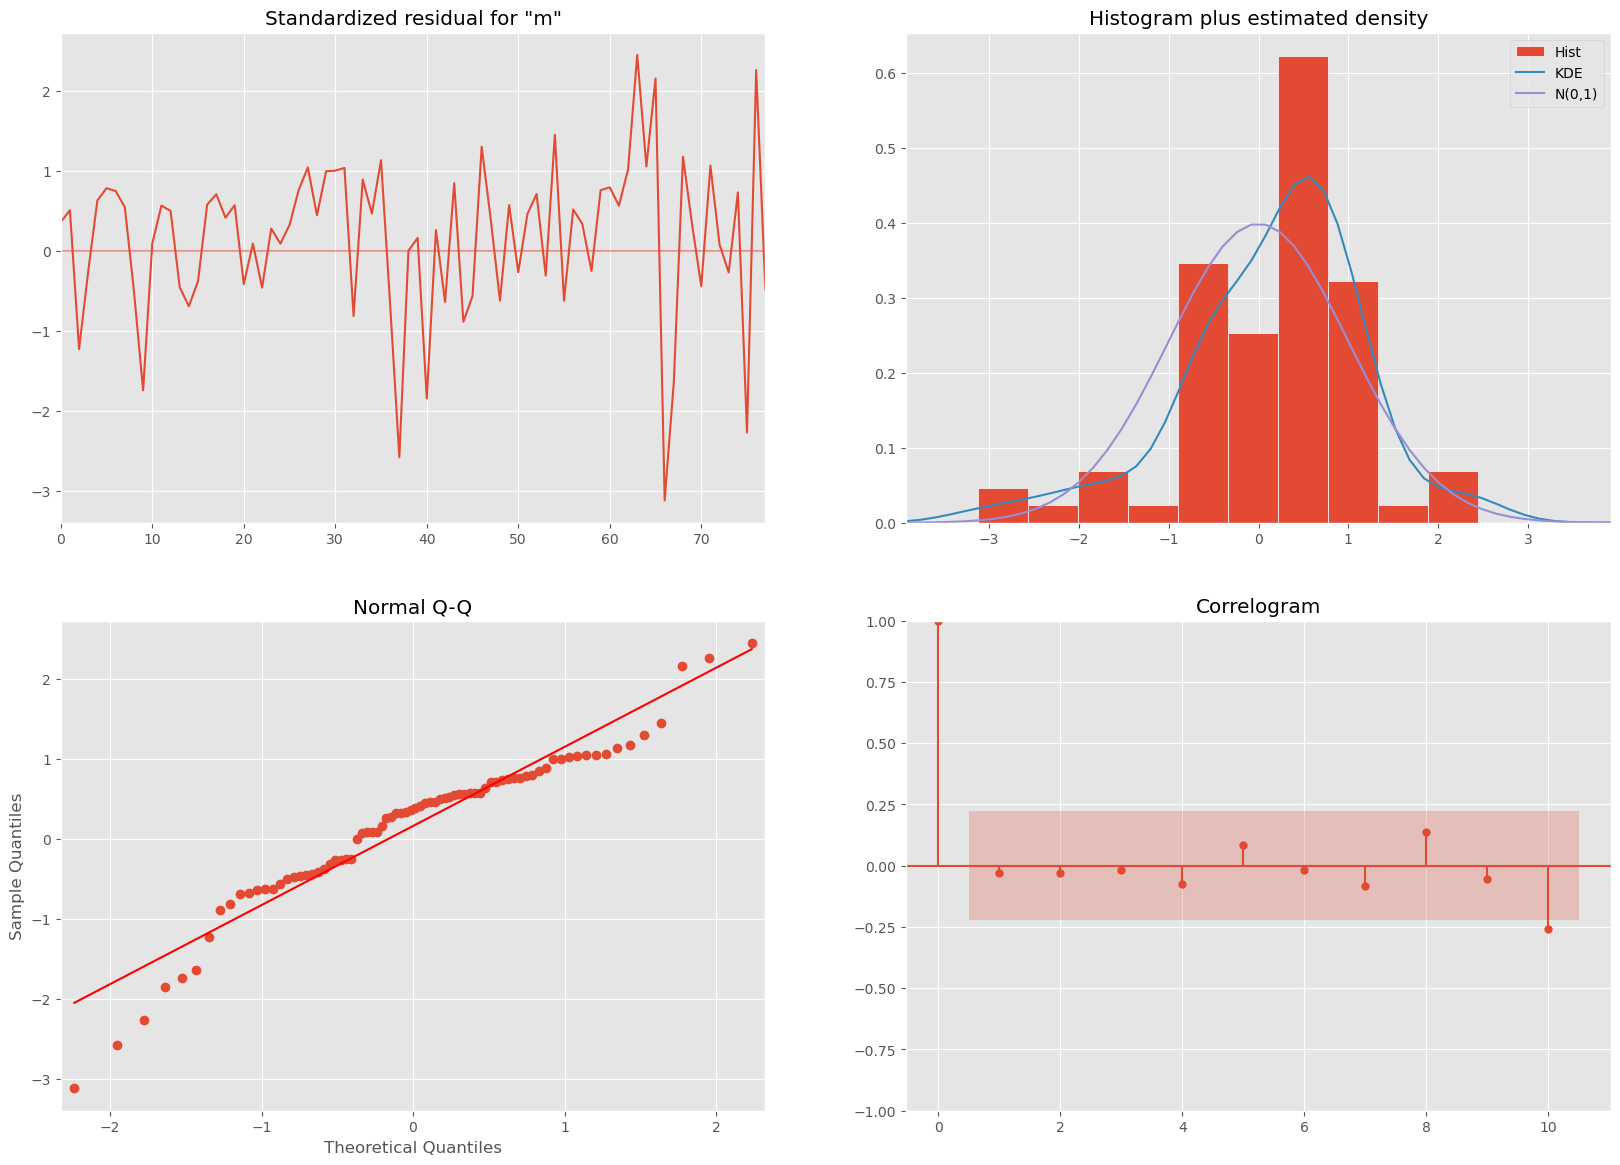

In [39]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [60]:
pred0 =results.get_prediction(start='2023-08-02',dynamic=False)
pred0_ci = pred0.conf_int()
#data2 = data.sort_index()
#duplicates = data2[data2.index.duplicated(keep='first')]
#print(data2)
#print(duplicates)
#print(pred0_ci)
pred0_ci

,lower modal_price,upper modal_price
Date,,
2023-08-02,2071.849047,2366.000846
2023-08-03,2046.640634,2340.149168
2023-08-04,2044.268629,2337.418424
2023-08-06,2011.546640,2304.500446
2023-08-07,2027.678710,2320.524981
2023-08-08,2071.107244,2363.894382
2023-08-09,2025.113731,2317.868364
2023-08-10,2093.050290,2385.786982
2023-08-13,2086.467582,2379.194283


In [67]:
#2023-09-03
pred1 = results.get_prediction(start='2023-09-03',dynamic=True)
pred1_ci = pred1.conf_int()
#print(pred1_ci)

# True forecasting of out of sample data. In this case the model
# is asked to preict data it has not seen before
#ARIMAResults.get_forecast(steps=1, signal_only=False, **kwargs)
#pred2 = results.get_forecast(1000)
#pred2_ci =pred2.conf_int()
#print(pred2.predicted_mean['2023-10-01':'2023-12-01'])
#print(pred2_ci)
pred1_ci

,lower modal_price,upper modal_price
Date,,
2023-09-03,2090.326919,2380.760913


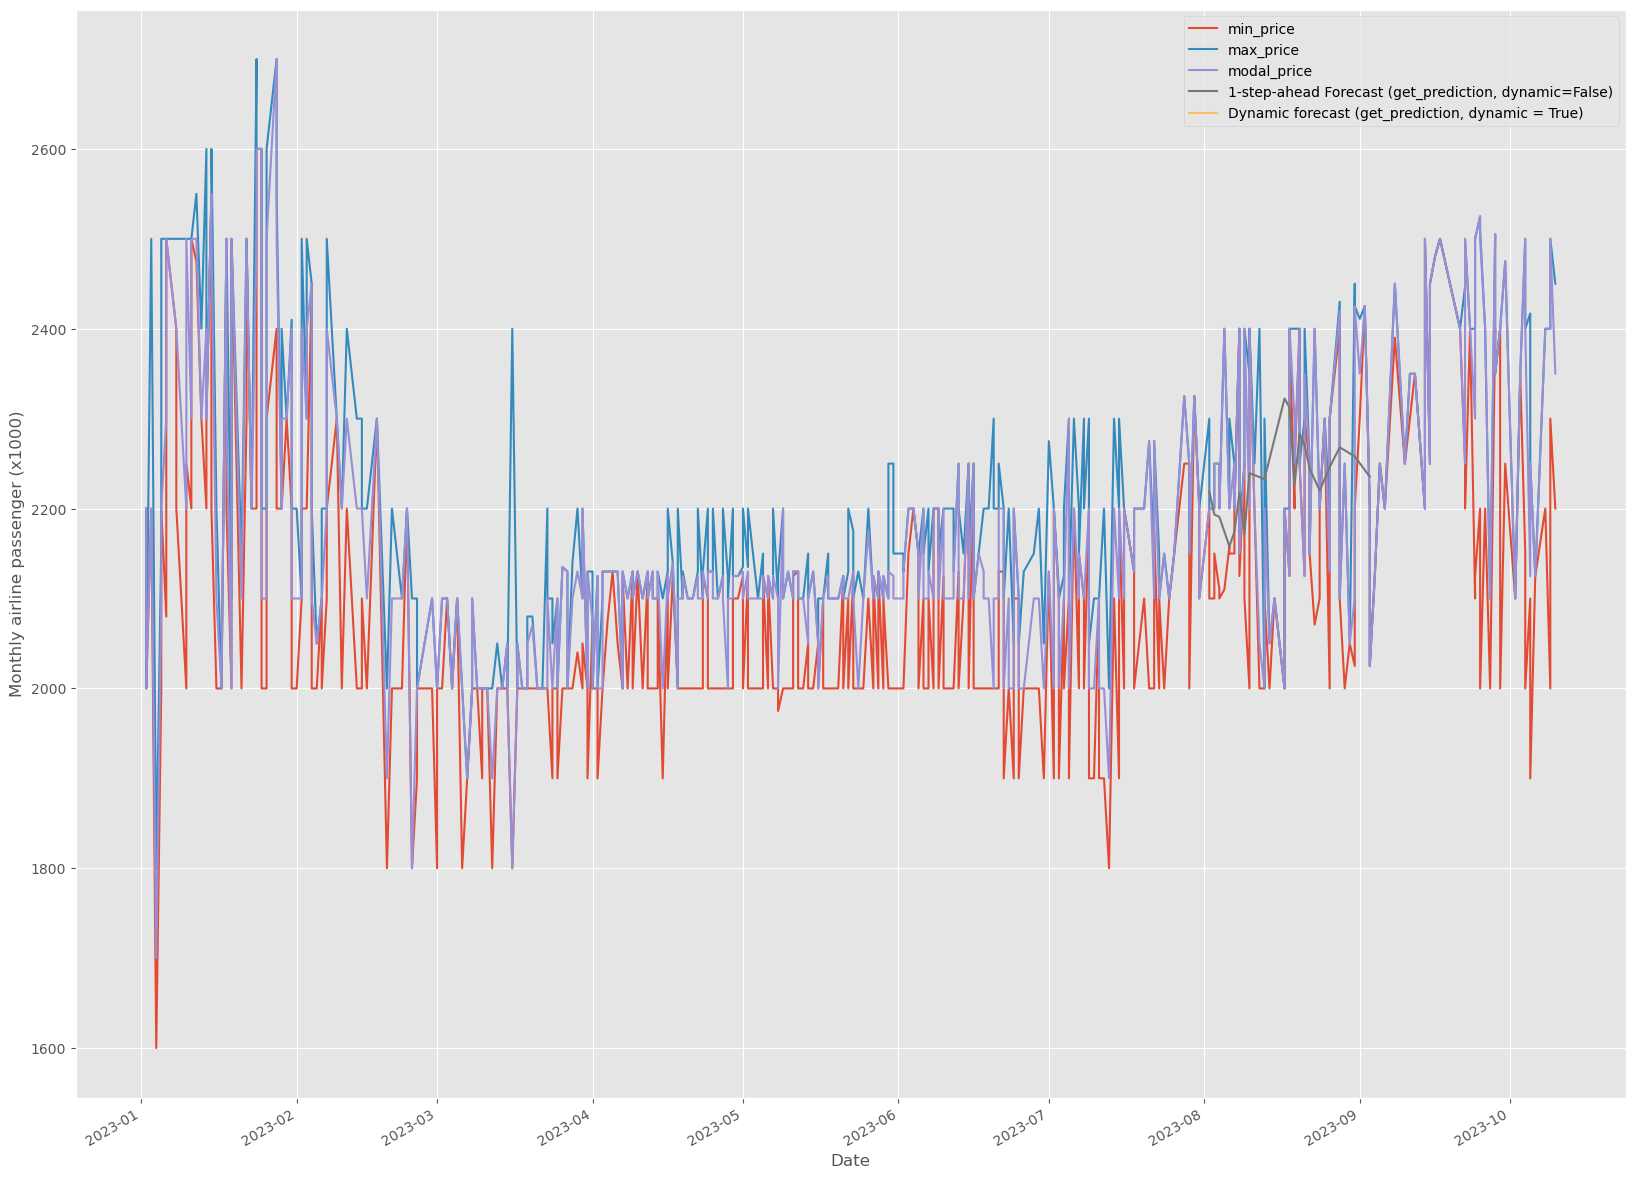

In [42]:
ax = data.plot(figsize=(20,16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_prediction, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic forecast (get_prediction, dynamic = True)')
#pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
#ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0],pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passenger (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()